# **Customer Satisfaction Prediction**

##  1. Data Preprocessing 

In [1]:
# Import Required Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Read the dataset in pandas
df = pd.read_csv("customer_support_tickets.csv")
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [3]:
# Find the shape of the dataset
df.shape

(8469, 17)

In [4]:
# Find the full information of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [5]:
# Find the Null or Missing Values in the dataset:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [6]:
# Handling missing and null values:
df = df.dropna()

In [7]:
# checking missing and null values again:
print(df.isnull().sum())
print(df.shape)

Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64
(2769, 17)


In [8]:
# Describe the dataset:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,2769.000000,2769.000000,2769.000000
mean,4237.163597,44.333694,2.991333
std,2446.830952,15.195495,1.407016
min,3.000000,18.000000,1.000000
25%,2145.000000,31.000000,2.000000
50%,4240.000000,45.000000,3.000000
75%,6329.000000,57.000000,4.000000
max,8468.000000,70.000000,5.000000


In [9]:
#  Encode categorical variables using LabelEncoder:
# Identify categorical columns
# Create a LabelEncoder instance
le = LabelEncoder()

# Identify categorical columns (object or category dtype)
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Apply LabelEncoder to each categorical column
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head(2)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
2,3,519,844,48,2,10,191,4,8,53,0,343,2,3,1347,2153,3.0
3,4,475,252,27,0,25,310,0,0,627,0,2549,2,3,946,293,3.0


# Exploratory Data Analysis(EDA):-

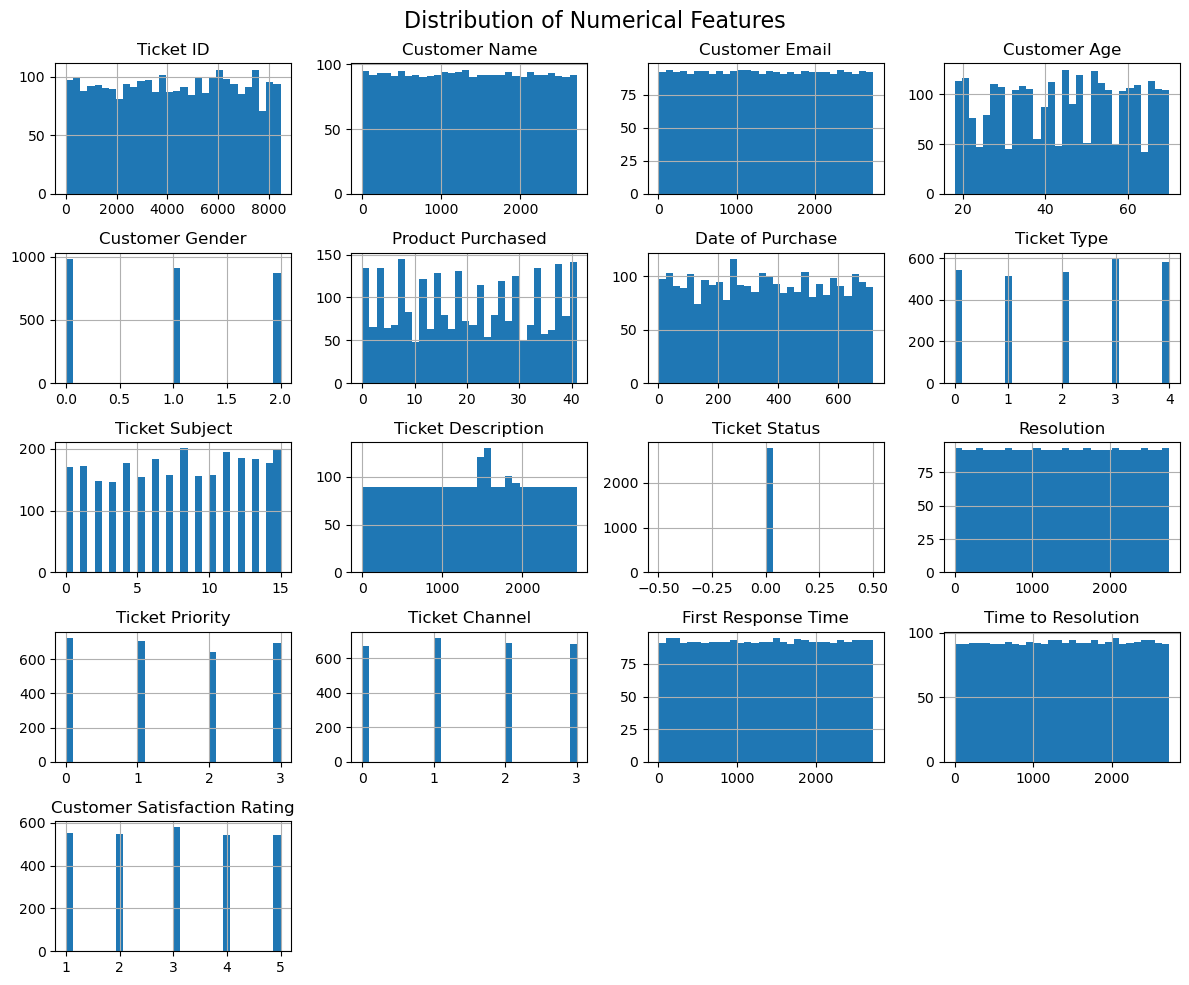

In [10]:
# Histogram for numeric columns :

num_features = df.select_dtypes(include=['int','float']).columns
df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

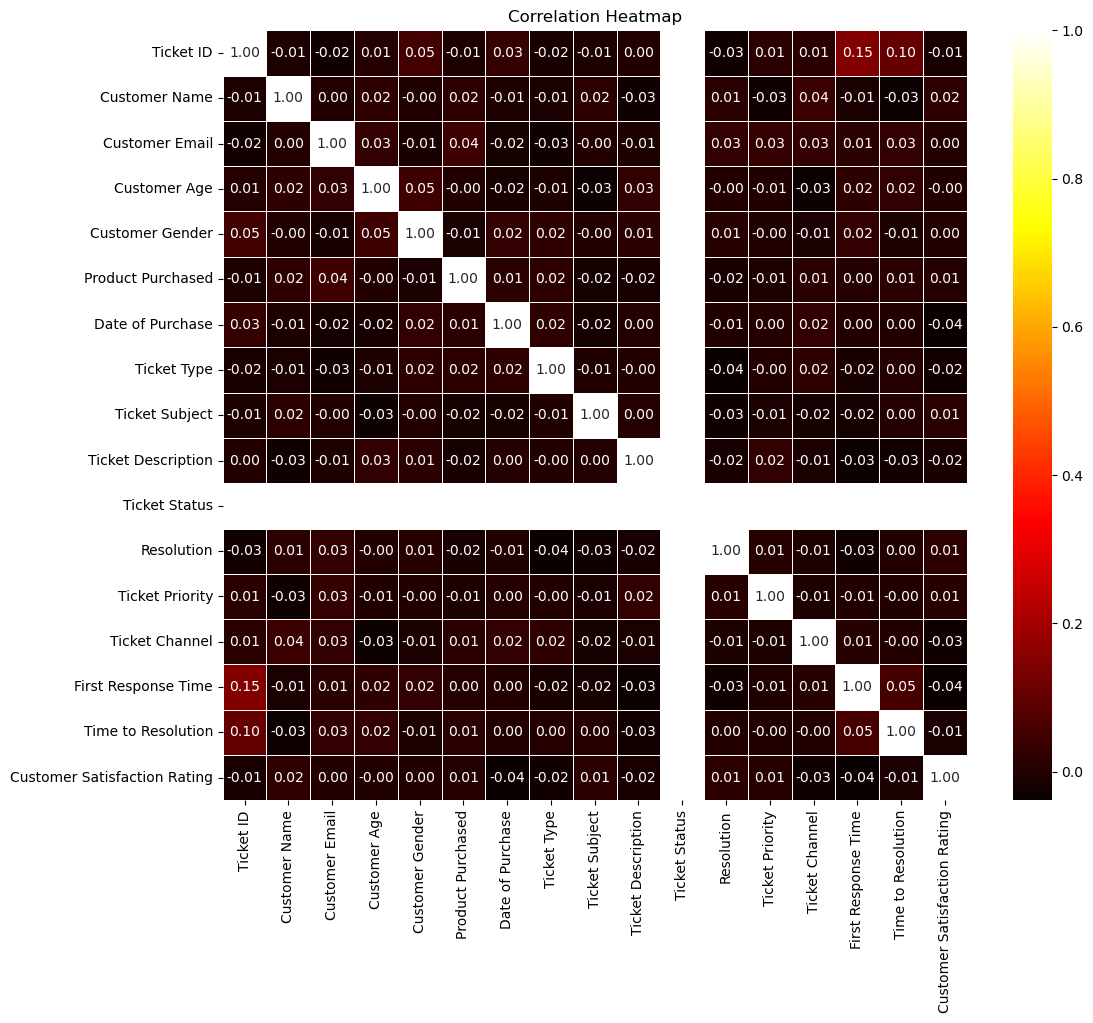

In [11]:
# Correlation Heatmap:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='hot', fmt=".2f", linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

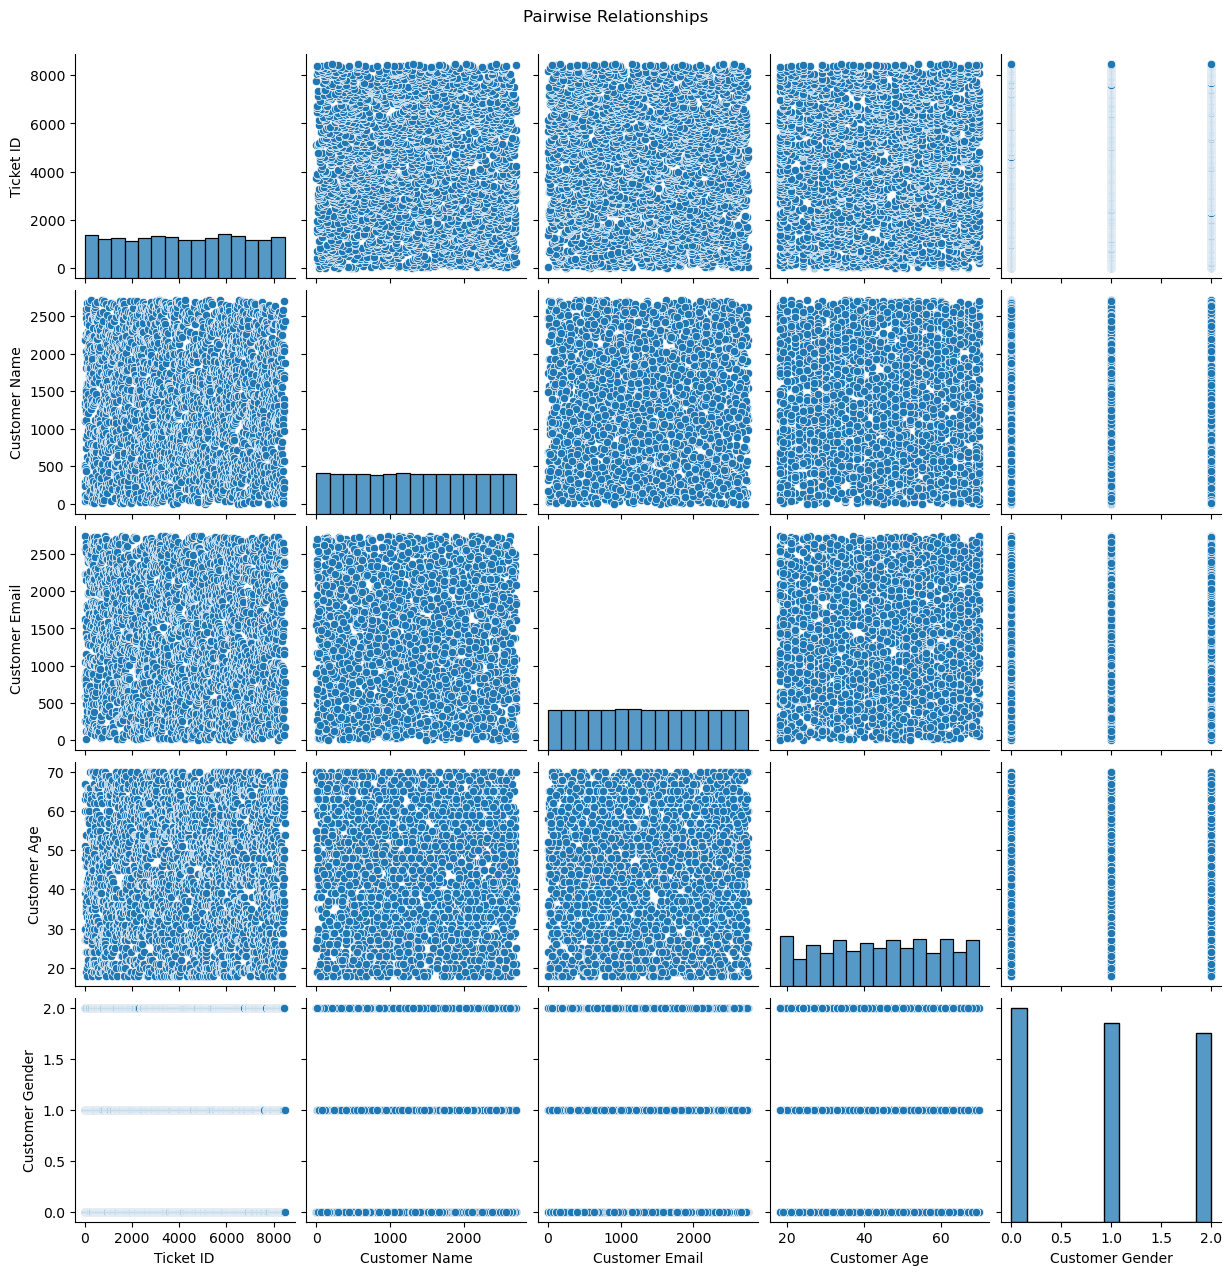

In [12]:
#Pairplot for selected columns:
selected_cols = df.columns[:5]  # Change based on your data
sns.pairplot(df[selected_cols])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

## Feature Engineering :
### Define the feature set X and the target variable Y:

In [13]:
# Convert Date columns to datetime and extract features :
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['purchase_hour'] = df['Date of Purchase'].dt.hour
df['purchase_day'] = df['Date of Purchase'].dt.day
df['purchase_month'] = df['Date of Purchase'].dt.month
df['purchase_dayofweek'] = df['Date of Purchase'].dt.dayofweek



In [14]:
# Droping the column Date of Purchase and Yearmonth
df = df.drop('Date of Purchase', axis = 1)

print(df.head())

    Ticket ID  Customer Name  Customer Email  Customer Age  Customer Gender  \
2           3            519             844            48                2   
3           4            475             252            27                0   
4           5             34             251            67                0   
10         11           1297            1619            48                1   
11         12            290             580            51                1   

    Product Purchased  Ticket Type  Ticket Subject  Ticket Description  \
2                  10            4               8                  53   
3                  25            0               0                 627   
4                   5            0               3                 188   
10                 30            1               3                1323   
11                 27            2              15                 360   

    Ticket Status  Resolution  Ticket Priority  Ticket Channel  \
2             

In [15]:
# convert time duration to minutes:
def convert_to_minutes(time_str):
    try:
        return float(time_str)

    except:
        return None

df['First_response_minutes'] = df['First Response Time'].apply(convert_to_minutes)
df['Resolution_minutes'] =df['Time to Resolution'].apply(convert_to_minutes)

In [16]:
print(df.head())

    Ticket ID  Customer Name  Customer Email  Customer Age  Customer Gender  \
2           3            519             844            48                2   
3           4            475             252            27                0   
4           5             34             251            67                0   
10         11           1297            1619            48                1   
11         12            290             580            51                1   

    Product Purchased  Ticket Type  Ticket Subject  Ticket Description  \
2                  10            4               8                  53   
3                  25            0               0                 627   
4                   5            0               3                 188   
10                 30            1               3                1323   
11                 27            2              15                 360   

    Ticket Status  ...  Ticket Channel  First Response Time  \
2               0

In [17]:
## Define the feature set x and target variable y.
X = df.drop(['Customer Satisfaction Rating'], axis = 1)
y = df['Customer Satisfaction Rating']

In [18]:
# Split Data into Training and Test(Training:80%, Test:20%):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### 4. Feature Scaling:
##### Standardize the features using StandardScaler to ensure all features contribute equally to the model.
 

In [19]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training features and transform them
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test features using the same scaler (do NOT fit again!)
X_test_scaled = scaler.transform(X_test)

# Optional: print shapes to confirm
print("Scaled X_train shape:", X_train_scaled.shape)
print("Scaled X_test shape:", X_test_scaled.shape)

Scaled X_train shape: (2215, 21)
Scaled X_test shape: (554, 21)


###  5. Model Building:
#### Train a RandomForestClassifier on the training data

In [20]:
# Initialize the RandomForestClassifier (you can tune hyperparameters as needed)
rfc = RandomForestClassifier(random_state=42)

# Train the model on the scaled training data
rfc.fit(X_train_scaled, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [21]:
# Predict customer satisfaction on the test data
y_pred = rfc.predict(X_test_scaled)

print("Predictions on test data completed.")

Predictions on test data completed.


### 6. Model Evaluation:
#### Evaluate the model using metrics like accuracy, classification report, and confusion matrix
 

In [22]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Classification report

class_report = classification_report(y_test, y_pred)
print("Classification report is:", class_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion Matrix is:", cm)

Accuracy: 0.2292418772563177
Classification report is:               precision    recall  f1-score   support

         1.0       0.23      0.23      0.23       109
         2.0       0.21      0.21      0.21       117
         3.0       0.26      0.29      0.28       112
         4.0       0.21      0.19      0.20       108
         5.0       0.23      0.21      0.22       108

    accuracy                           0.23       554
   macro avg       0.23      0.23      0.23       554
weighted avg       0.23      0.23      0.23       554

confusion Matrix is: [[25 25 17 23 19]
 [26 25 27 20 19]
 [24 19 33 18 18]
 [17 23 24 21 23]
 [16 25 24 20 23]]


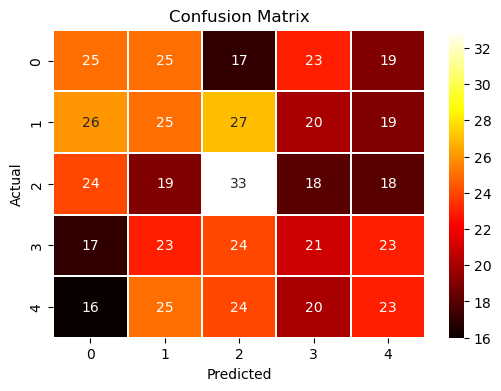

In [23]:
# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='hot',linewidth = .01)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

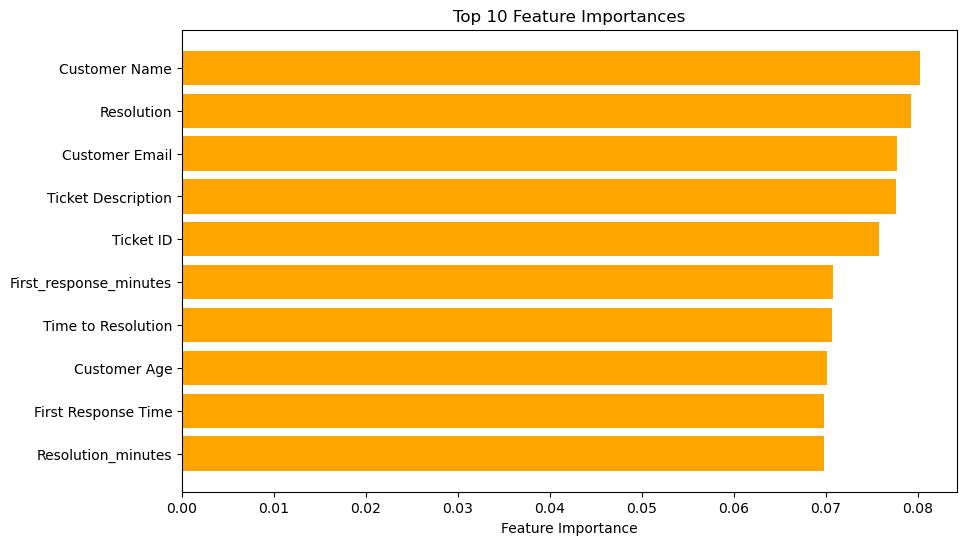

In [24]:
# Get feature importances from the model
importances = rfc.feature_importances_

# Assuming X is a DataFrame (if it's a numpy array, replace accordingly)
feature_names = X.columns

# Create a DataFrame for feature importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance descending and get top 10
top_features = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1], color='orange')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.show()